In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('sample.jpg', cv2.IMREAD_COLOR)
image = cv2.resize(image, (256, 256))

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

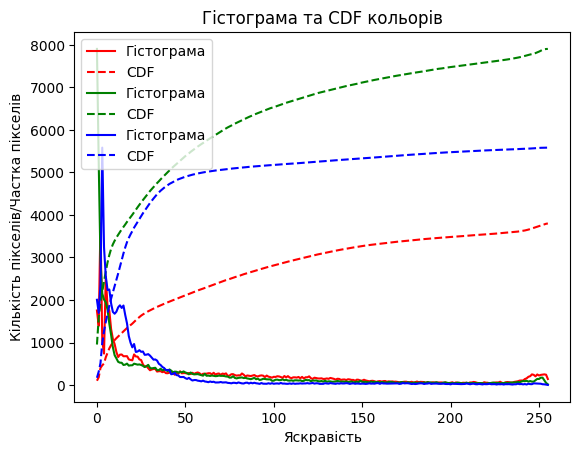

In [3]:
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    histogram, bin_edges = np.histogram(rgb_image[:, :, i], bins=256, range=(0, 256))
    cdf = histogram.cumsum()
    cdf_normalized = cdf * histogram.max() / cdf.max()  # Нормалізація для кращого відображення

    plt.plot(bin_edges[0:-1], histogram, color=color, label='Гістограма')
    plt.plot(bin_edges[0:-1], cdf_normalized, color=color, linestyle='--', label='CDF')

plt.title("Гістограма та CDF кольорів")
plt.xlabel("Яскравість")
plt.ylabel("Кількість пікселів/Частка пікселів")
plt.legend()
plt.show()

In [4]:
# Вирівнювання гістограми для зображення в градаціях сірого
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
equalized_gray = cv2.equalizeHist(gray_image)

In [5]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
equalized_gray = cv2.equalizeHist(gray_image)

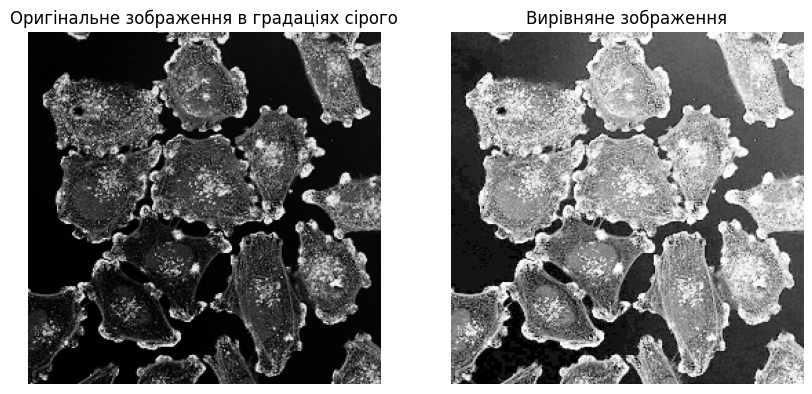

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(gray_image, cmap='gray')
axs[0].set_title('Оригінальне зображення в градаціях сірого')
axs[0].axis('off')

axs[1].imshow(equalized_gray, cmap='gray')
axs[1].set_title('Вирівняне зображення')
axs[1].axis('off')

plt.show()

In [7]:
# Вирівнювання гістограми для кольорового зображення
channels = cv2.split(image)
eq_channels = [cv2.equalizeHist(ch) for ch in channels]
equalized_color_image = cv2.merge(eq_channels)
equalized_color_image_rgb = cv2.cvtColor(equalized_color_image, cv2.COLOR_BGR2RGB)

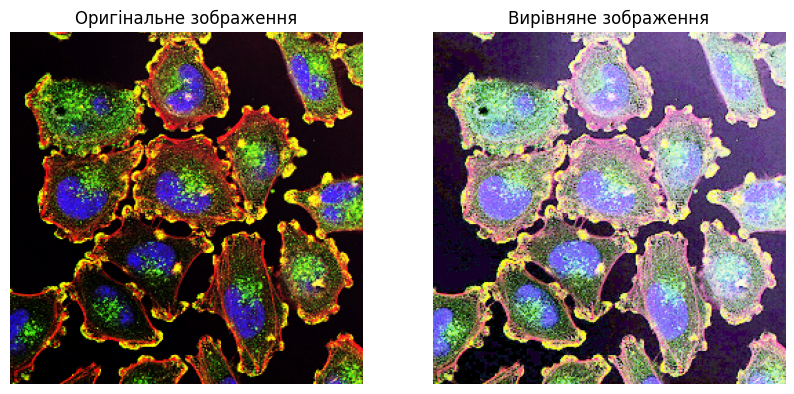

In [8]:
# Відображення результату для кольорового зображення
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(rgb_image)
axs[0].set_title('Оригінальне зображення')
axs[0].axis('off')

axs[1].imshow(equalized_color_image_rgb)
axs[1].set_title('Вирівняне зображення')
axs[1].axis('off')

plt.show()

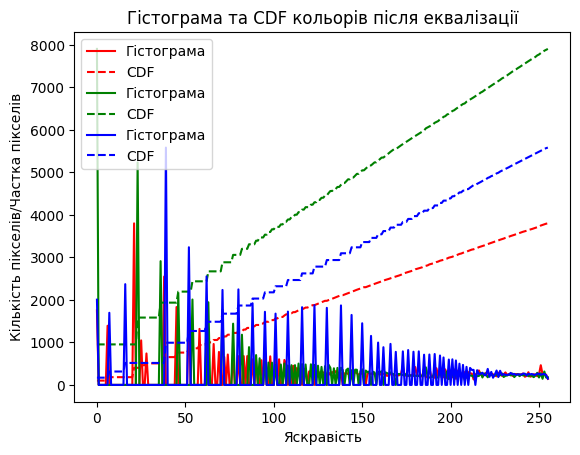

In [9]:
colors = ('r', 'g', 'b')

for i, color in enumerate(colors):
    histogram, bin_edges = np.histogram(equalized_color_image_rgb[:, :, i], bins=256, range=(0, 256))
    cdf = histogram.cumsum()
    cdf_normalized = cdf * histogram.max() / cdf.max()

    plt.plot(bin_edges[0:-1], histogram, color=color, label='Гістограма')
    plt.plot(bin_edges[0:-1], cdf_normalized, color=color, linestyle='--', label='CDF')

plt.title("Гістограма та CDF кольорів після еквалізації")
plt.xlabel("Яскравість")
plt.ylabel("Кількість пікселів/Частка пікселів")
plt.legend()
plt.show()